In [1]:
import numpy as np

import tsplib95
import networkx as nx

import os
import pandas as pd
import gilsrvnd
import DBMEA
import grasp
import pickle
from matplotlib import pyplot as plt

#import stats
import scipy.stats as stats






In [2]:
df = pd.read_csv("matrix_super.csv")
df

,file,GILS_cost,DBMEA_cost,GRASP_cost,GILS_time,DBMEA_time,GRASP_time,min_method,n,m,...,between_var,between_q25,between_q75,closeness_min,closeness_max,closeness_mean,closeness_std,closeness_var,closeness_q25,closeness_q75
0,att48.tsp,226229.0,207771.0,301702.0,6.474685,5.288543,0.026019,DBMEA_cost,48,1176,...,0.000008,0.022051,0.026965,0.000574,0.001325,0.001012,0.000205,4.221718e-08,0.000889,0.001191
1,berlin52.tsp,145419.0,143278.0,191072.0,6.054587,5.374160,0.031533,DBMEA_cost,52,1378,...,0.000065,0.021686,0.032662,0.000919,0.002555,0.001893,0.000507,2.566472e-07,0.001447,0.002371
2,brazil58.tsp,532454.0,535150.0,709540.0,8.013889,9.045840,0.043413,GILS_cost,58,1711,...,0.000591,0.020050,0.042040,0.000201,0.000736,0.000562,0.000145,2.104825e-08,0.000458,0.000692
3,burma14.tsp,16457.0,16457.0,18393.0,0.156218,0.082072,0.001000,GRASP_time,14,105,...,0.000097,0.000000,0.006410,0.001313,0.002677,0.002193,0.000407,1.654824e-07,0.002048,0.002518
4,dantzig42.tsp,12392.0,12256.0,14523.0,2.579336,3.325098,0.016044,DBMEA_cost,42,903,...,0.000788,0.033226,0.062177,0.008369,0.019061,0.014587,0.003118,9.721282e-06,0.011758,0.016824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,srandom_91_96.tsp,1603056.0,1651652.0,2692697.0,30.021509,43.846168,0.257267,GILS_cost,91,4186,...,0.000005,0.012572,0.015648,0.000274,0.000522,0.000399,0.000066,4.317079e-09,0.000352,0.000459
435,srandom_95_81.tsp,1686640.0,1758693.0,3065490.0,39.880181,41.918330,0.294402,GILS_cost,95,4560,...,0.000006,0.011738,0.015896,0.000256,0.000490,0.000380,0.000052,2.721331e-09,0.000340,0.000424
436,srandom_96_63.tsp,1909301.0,1847337.0,2808284.0,33.306335,45.883843,0.297344,DBMEA_cost,96,4656,...,0.000007,0.011653,0.015989,0.000278,0.000536,0.000404,0.000065,4.246357e-09,0.000355,0.000460
437,srandom_99_74.tsp,2002650.0,1961511.0,3304424.0,46.667097,60.949679,0.331193,DBMEA_cost,99,4950,...,0.000007,0.011239,0.015325,0.000288,0.000540,0.000406,0.000068,4.648060e-09,0.000346,0.000461


In [3]:
X = df.drop(['file', 'min_method', "GILS_cost", "GILS_time", "GRASP_cost", "GRASP_time", "DBMEA_cost", "DBMEA_time"], axis=1)
y = df['min_method']

In [4]:
# load the classifier decisiontree.pkl
decisiontree = pickle.load(open('decisiontree.pkl', 'rb'))

In [5]:
# predict the class for the new data point
ypred = decisiontree.predict(X)
ypred

array(['DBMEA_cost', 'DBMEA_cost', 'GILS_cost', 'GRASP_time',
       'DBMEA_cost', 'DBMEA_cost', 'DBMEA_cost', 'DBMEA_cost',
       'DBMEA_cost', 'GILS_cost', 'DBMEA_cost', 'DBMEA_cost',
       'DBMEA_cost', 'DBMEA_cost', 'DBMEA_cost', 'DBMEA_cost',
       'DBMEA_cost', 'GILS_cost', 'GILS_cost', 'GILS_cost', 'DBMEA_cost',
       'DBMEA_cost', 'DBMEA_cost', 'GILS_cost', 'GILS_cost', 'GILS_cost',
       'GILS_cost', 'GILS_cost', 'GILS_cost', 'GILS_cost', 'GILS_cost',
       'GILS_cost', 'DBMEA_cost', 'DBMEA_cost', 'GILS_cost', 'GILS_cost',
       'DBMEA_cost', 'DBMEA_cost', 'DBMEA_cost', 'DBMEA_cost',
       'DBMEA_cost', 'DBMEA_cost', 'DBMEA_cost', 'DBMEA_cost',
       'DBMEA_cost', 'DBMEA_cost', 'GRASP_time', 'GRASP_time',
       'GRASP_time', 'GRASP_time', 'GRASP_time', 'GRASP_time',
       'GRASP_time', 'GRASP_time', 'GRASP_time', 'GRASP_time',
       'GILS_cost', 'GILS_cost', 'GILS_cost', 'GILS_cost', 'GILS_cost',
       'GILS_cost', 'GILS_cost', 'GILS_cost', 'GILS_cost', 'GILS_cost

In [6]:
df["prediction"] = ypred

In [7]:
# create new column called selection cost
df["selection_cost"] = np.where(df["prediction"] == "GILS_cost", df["GILS_cost"], 0)
df["selection_cost"] = np.where(df["prediction"] == "GRASP_time", df["GRASP_cost"], df["selection_cost"])
df["selection_cost"] = np.where(df["prediction"] == "DBMEA_cost", df["DBMEA_cost"], df["selection_cost"])
df

,file,GILS_cost,DBMEA_cost,GRASP_cost,GILS_time,DBMEA_time,GRASP_time,min_method,n,m,...,between_q75,closeness_min,closeness_max,closeness_mean,closeness_std,closeness_var,closeness_q25,closeness_q75,prediction,selection_cost
0,att48.tsp,226229.0,207771.0,301702.0,6.474685,5.288543,0.026019,DBMEA_cost,48,1176,...,0.026965,0.000574,0.001325,0.001012,0.000205,4.221718e-08,0.000889,0.001191,DBMEA_cost,207771.0
1,berlin52.tsp,145419.0,143278.0,191072.0,6.054587,5.374160,0.031533,DBMEA_cost,52,1378,...,0.032662,0.000919,0.002555,0.001893,0.000507,2.566472e-07,0.001447,0.002371,DBMEA_cost,143278.0
2,brazil58.tsp,532454.0,535150.0,709540.0,8.013889,9.045840,0.043413,GILS_cost,58,1711,...,0.042040,0.000201,0.000736,0.000562,0.000145,2.104825e-08,0.000458,0.000692,GILS_cost,532454.0
3,burma14.tsp,16457.0,16457.0,18393.0,0.156218,0.082072,0.001000,GRASP_time,14,105,...,0.006410,0.001313,0.002677,0.002193,0.000407,1.654824e-07,0.002048,0.002518,GRASP_time,18393.0
4,dantzig42.tsp,12392.0,12256.0,14523.0,2.579336,3.325098,0.016044,DBMEA_cost,42,903,...,0.062177,0.008369,0.019061,0.014587,0.003118,9.721282e-06,0.011758,0.016824,DBMEA_cost,12256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,srandom_91_96.tsp,1603056.0,1651652.0,2692697.0,30.021509,43.846168,0.257267,GILS_cost,91,4186,...,0.015648,0.000274,0.000522,0.000399,0.000066,4.317079e-09,0.000352,0.000459,GILS_cost,1603056.0
435,srandom_95_81.tsp,1686640.0,1758693.0,3065490.0,39.880181,41.918330,0.294402,GILS_cost,95,4560,...,0.015896,0.000256,0.000490,0.000380,0.000052,2.721331e-09,0.000340,0.000424,GILS_cost,1686640.0
436,srandom_96_63.tsp,1909301.0,1847337.0,2808284.0,33.306335,45.883843,0.297344,DBMEA_cost,96,4656,...,0.015989,0.000278,0.000536,0.000404,0.000065,4.246357e-09,0.000355,0.000460,GILS_cost,1909301.0
437,srandom_99_74.tsp,2002650.0,1961511.0,3304424.0,46.667097,60.949679,0.331193,DBMEA_cost,99,4950,...,0.015325,0.000288,0.000540,0.000406,0.000068,4.648060e-09,0.000346,0.000461,GILS_cost,2002650.0


In [8]:
# create new column called selection time
df["selection_time"] = np.where(df["prediction"] == "GILS_cost", df["GILS_time"], 0)
df["selection_time"] = np.where(df["prediction"] == "GRASP_time", df["GRASP_time"], df["selection_time"])
df["selection_time"] = np.where(df["prediction"] == "DBMEA_cost", df["DBMEA_time"], df["selection_time"])
df

,file,GILS_cost,DBMEA_cost,GRASP_cost,GILS_time,DBMEA_time,GRASP_time,min_method,n,m,...,closeness_min,closeness_max,closeness_mean,closeness_std,closeness_var,closeness_q25,closeness_q75,prediction,selection_cost,selection_time
0,att48.tsp,226229.0,207771.0,301702.0,6.474685,5.288543,0.026019,DBMEA_cost,48,1176,...,0.000574,0.001325,0.001012,0.000205,4.221718e-08,0.000889,0.001191,DBMEA_cost,207771.0,5.288543
1,berlin52.tsp,145419.0,143278.0,191072.0,6.054587,5.374160,0.031533,DBMEA_cost,52,1378,...,0.000919,0.002555,0.001893,0.000507,2.566472e-07,0.001447,0.002371,DBMEA_cost,143278.0,5.374160
2,brazil58.tsp,532454.0,535150.0,709540.0,8.013889,9.045840,0.043413,GILS_cost,58,1711,...,0.000201,0.000736,0.000562,0.000145,2.104825e-08,0.000458,0.000692,GILS_cost,532454.0,8.013889
3,burma14.tsp,16457.0,16457.0,18393.0,0.156218,0.082072,0.001000,GRASP_time,14,105,...,0.001313,0.002677,0.002193,0.000407,1.654824e-07,0.002048,0.002518,GRASP_time,18393.0,0.001000
4,dantzig42.tsp,12392.0,12256.0,14523.0,2.579336,3.325098,0.016044,DBMEA_cost,42,903,...,0.008369,0.019061,0.014587,0.003118,9.721282e-06,0.011758,0.016824,DBMEA_cost,12256.0,3.325098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,srandom_91_96.tsp,1603056.0,1651652.0,2692697.0,30.021509,43.846168,0.257267,GILS_cost,91,4186,...,0.000274,0.000522,0.000399,0.000066,4.317079e-09,0.000352,0.000459,GILS_cost,1603056.0,30.021509
435,srandom_95_81.tsp,1686640.0,1758693.0,3065490.0,39.880181,41.918330,0.294402,GILS_cost,95,4560,...,0.000256,0.000490,0.000380,0.000052,2.721331e-09,0.000340,0.000424,GILS_cost,1686640.0,39.880181
436,srandom_96_63.tsp,1909301.0,1847337.0,2808284.0,33.306335,45.883843,0.297344,DBMEA_cost,96,4656,...,0.000278,0.000536,0.000404,0.000065,4.246357e-09,0.000355,0.000460,GILS_cost,1909301.0,33.306335
437,srandom_99_74.tsp,2002650.0,1961511.0,3304424.0,46.667097,60.949679,0.331193,DBMEA_cost,99,4950,...,0.000288,0.000540,0.000406,0.000068,4.648060e-09,0.000346,0.000461,GILS_cost,2002650.0,46.667097


In [52]:
import scipy.stats as stats

# paired t-test for selection cost and gils cost
stats.ttest_rel(df["selection_cost"], df["GILS_cost"])
# wilccoxon signed rank test
stats.wilcoxon(df["selection_cost"], df["GILS_cost"])
stats.ttest_rel(df["selection_time"], df["GILS_time"])
stats.wilcoxon(df["selection_time"], df["GILS_time"])


TtestResult(statistic=-3.5775196640418856, pvalue=0.0003975299287547388, df=338)

In [35]:
# only select between 50th and 100th quantile
subs = df[(df['selection_cost'] > df['selection_cost'].quantile(.50)) & (df['selection_cost'] < df['selection_cost'].quantile(.75))]
subs

,file,GILS_cost,DBMEA_cost,GRASP_cost,GILS_time,DBMEA_time,GRASP_time,min_method,n,m,...,closeness_mean,closeness_std,closeness_var,closeness_q25,closeness_q75,prediction,selection_cost,selection_time,correct,actual_predicted
1,berlin52.tsp,145419.0,143278.0,191072.0,6.054587,5.374160,0.031533,DBMEA_cost,52,1378,...,0.001893,0.000507,2.566472e-07,0.001447,0.002371,DBMEA_cost,143278.0,5.374160,1,DBMEA_cost DBMEA_cost
8,gr48.tsp,103651.0,106126.0,141005.0,3.950934,3.431822,0.024082,GILS_cost,48,1176,...,0.002414,0.000396,1.567968e-07,0.002061,0.002704,DBMEA_cost,106126.0,3.431822,0,GILS_cost DBMEA_cost
32,mod_rat99.tsp,63993.0,64328.0,99191.0,31.700262,72.227249,0.212773,GILS_cost,100,5050,...,0.010455,0.001879,3.531972e-06,0.008979,0.011925,DBMEA_cost,64328.0,72.227249,0,GILS_cost DBMEA_cost
36,random_100_0.tsp,199443.0,193832.0,343833.0,38.027737,67.895690,0.213709,DBMEA_cost,100,5050,...,0.004028,0.000622,3.869011e-07,0.003598,0.004456,DBMEA_cost,193832.0,67.895690,1,DBMEA_cost DBMEA_cost
37,random_100_1.tsp,191675.0,179287.0,338273.0,47.253155,70.396532,0.212266,DBMEA_cost,100,5050,...,0.003867,0.000560,3.131995e-07,0.003429,0.004251,DBMEA_cost,179287.0,70.396532,1,DBMEA_cost DBMEA_cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,srandom_20_62.tsp,153031.0,148311.0,188934.0,0.509314,0.328140,0.003009,DBMEA_cost,20,210,...,0.000357,0.000051,2.604758e-09,0.000316,0.000396,GILS_cost,153031.0,0.509314,0,DBMEA_cost GILS_cost
345,srandom_21_45.tsp,181028.0,187840.0,244148.0,0.789181,0.309111,0.003512,GILS_cost,21,231,...,0.000349,0.000048,2.340947e-09,0.000310,0.000388,GILS_cost,181028.0,0.789181,1,GILS_cost GILS_cost
346,srandom_22_86.tsp,166434.0,174185.0,276814.0,1.251143,0.298004,0.004464,GILS_cost,22,253,...,0.000439,0.000080,6.460166e-09,0.000381,0.000501,GILS_cost,166434.0,1.251143,1,GILS_cost GILS_cost
349,srandom_24_89.tsp,175395.0,174784.0,193853.0,0.690975,0.372636,0.006001,DBMEA_cost,24,300,...,0.000459,0.000075,5.592196e-09,0.000418,0.000520,DBMEA_cost,174784.0,0.372636,1,DBMEA_cost DBMEA_cost


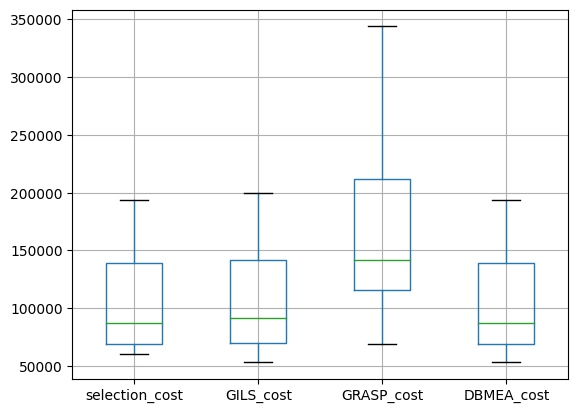

In [36]:


# create 4 box plots for each method, selection cost, gils cost, grasp cost, dbmea cost
subs.boxplot(column=['selection_cost', 'GILS_cost', 'GRASP_cost', 'DBMEA_cost'])
# save the image
#plt.savefig('boxplotsuper.png')
plt.show()


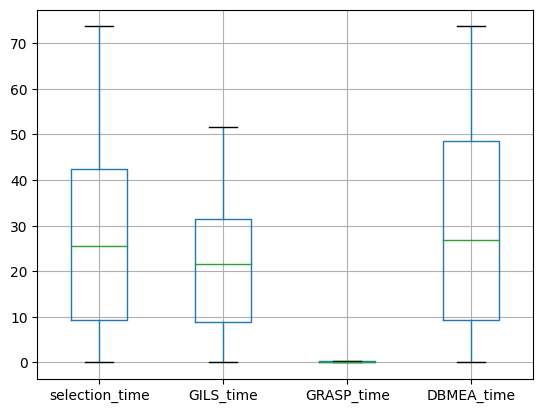

In [37]:
subs.boxplot(column=['selection_time', 'GILS_time', 'GRASP_time', 'DBMEA_time'])
# save the image
#plt.savefig('boxplotsupertime.png')
plt.show()

In [12]:
# get mean of columns gils dbmea grasp selection cost
df[['GILS_cost', 'DBMEA_cost', 'GRASP_cost', 'selection_cost']].mean()


GILS_cost         292647.072893
DBMEA_cost        289333.958998
GRASP_cost        451304.027335
selection_cost    291568.034169
dtype: float64

In [13]:
# get mean of columns gils dbmea grasp selection time
df[['GILS_time', 'DBMEA_time', 'GRASP_time', 'selection_time']].mean()

GILS_time         12.454884
DBMEA_time        17.222567
GRASP_time         0.084792
selection_time    15.138615
dtype: float64

In [14]:
# create a new column, if prediction == min_method, then 1, else 0
df["correct"] = np.where(df["prediction"] == df["min_method"], 1, 0)
df

,file,GILS_cost,DBMEA_cost,GRASP_cost,GILS_time,DBMEA_time,GRASP_time,min_method,n,m,...,closeness_max,closeness_mean,closeness_std,closeness_var,closeness_q25,closeness_q75,prediction,selection_cost,selection_time,correct
0,att48.tsp,226229.0,207771.0,301702.0,6.474685,5.288543,0.026019,DBMEA_cost,48,1176,...,0.001325,0.001012,0.000205,4.221718e-08,0.000889,0.001191,DBMEA_cost,207771.0,5.288543,1
1,berlin52.tsp,145419.0,143278.0,191072.0,6.054587,5.374160,0.031533,DBMEA_cost,52,1378,...,0.002555,0.001893,0.000507,2.566472e-07,0.001447,0.002371,DBMEA_cost,143278.0,5.374160,1
2,brazil58.tsp,532454.0,535150.0,709540.0,8.013889,9.045840,0.043413,GILS_cost,58,1711,...,0.000736,0.000562,0.000145,2.104825e-08,0.000458,0.000692,GILS_cost,532454.0,8.013889,1
3,burma14.tsp,16457.0,16457.0,18393.0,0.156218,0.082072,0.001000,GRASP_time,14,105,...,0.002677,0.002193,0.000407,1.654824e-07,0.002048,0.002518,GRASP_time,18393.0,0.001000,1
4,dantzig42.tsp,12392.0,12256.0,14523.0,2.579336,3.325098,0.016044,DBMEA_cost,42,903,...,0.019061,0.014587,0.003118,9.721282e-06,0.011758,0.016824,DBMEA_cost,12256.0,3.325098,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,srandom_91_96.tsp,1603056.0,1651652.0,2692697.0,30.021509,43.846168,0.257267,GILS_cost,91,4186,...,0.000522,0.000399,0.000066,4.317079e-09,0.000352,0.000459,GILS_cost,1603056.0,30.021509,1
435,srandom_95_81.tsp,1686640.0,1758693.0,3065490.0,39.880181,41.918330,0.294402,GILS_cost,95,4560,...,0.000490,0.000380,0.000052,2.721331e-09,0.000340,0.000424,GILS_cost,1686640.0,39.880181,1
436,srandom_96_63.tsp,1909301.0,1847337.0,2808284.0,33.306335,45.883843,0.297344,DBMEA_cost,96,4656,...,0.000536,0.000404,0.000065,4.246357e-09,0.000355,0.000460,GILS_cost,1909301.0,33.306335,0
437,srandom_99_74.tsp,2002650.0,1961511.0,3304424.0,46.667097,60.949679,0.331193,DBMEA_cost,99,4950,...,0.000540,0.000406,0.000068,4.648060e-09,0.000346,0.000461,GILS_cost,2002650.0,46.667097,0


In [15]:
df["correct"].value_counts()

correct
1    280
0    159
Name: count, dtype: int64

In [16]:
# new column called combined where the string = min_method + prediction
df["actual_predicted"] = df["min_method"] + " " + df["prediction"]
df

,file,GILS_cost,DBMEA_cost,GRASP_cost,GILS_time,DBMEA_time,GRASP_time,min_method,n,m,...,closeness_mean,closeness_std,closeness_var,closeness_q25,closeness_q75,prediction,selection_cost,selection_time,correct,actual_predicted
0,att48.tsp,226229.0,207771.0,301702.0,6.474685,5.288543,0.026019,DBMEA_cost,48,1176,...,0.001012,0.000205,4.221718e-08,0.000889,0.001191,DBMEA_cost,207771.0,5.288543,1,DBMEA_cost DBMEA_cost
1,berlin52.tsp,145419.0,143278.0,191072.0,6.054587,5.374160,0.031533,DBMEA_cost,52,1378,...,0.001893,0.000507,2.566472e-07,0.001447,0.002371,DBMEA_cost,143278.0,5.374160,1,DBMEA_cost DBMEA_cost
2,brazil58.tsp,532454.0,535150.0,709540.0,8.013889,9.045840,0.043413,GILS_cost,58,1711,...,0.000562,0.000145,2.104825e-08,0.000458,0.000692,GILS_cost,532454.0,8.013889,1,GILS_cost GILS_cost
3,burma14.tsp,16457.0,16457.0,18393.0,0.156218,0.082072,0.001000,GRASP_time,14,105,...,0.002193,0.000407,1.654824e-07,0.002048,0.002518,GRASP_time,18393.0,0.001000,1,GRASP_time GRASP_time
4,dantzig42.tsp,12392.0,12256.0,14523.0,2.579336,3.325098,0.016044,DBMEA_cost,42,903,...,0.014587,0.003118,9.721282e-06,0.011758,0.016824,DBMEA_cost,12256.0,3.325098,1,DBMEA_cost DBMEA_cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,srandom_91_96.tsp,1603056.0,1651652.0,2692697.0,30.021509,43.846168,0.257267,GILS_cost,91,4186,...,0.000399,0.000066,4.317079e-09,0.000352,0.000459,GILS_cost,1603056.0,30.021509,1,GILS_cost GILS_cost
435,srandom_95_81.tsp,1686640.0,1758693.0,3065490.0,39.880181,41.918330,0.294402,GILS_cost,95,4560,...,0.000380,0.000052,2.721331e-09,0.000340,0.000424,GILS_cost,1686640.0,39.880181,1,GILS_cost GILS_cost
436,srandom_96_63.tsp,1909301.0,1847337.0,2808284.0,33.306335,45.883843,0.297344,DBMEA_cost,96,4656,...,0.000404,0.000065,4.246357e-09,0.000355,0.000460,GILS_cost,1909301.0,33.306335,0,DBMEA_cost GILS_cost
437,srandom_99_74.tsp,2002650.0,1961511.0,3304424.0,46.667097,60.949679,0.331193,DBMEA_cost,99,4950,...,0.000406,0.000068,4.648060e-09,0.000346,0.000461,GILS_cost,2002650.0,46.667097,0,DBMEA_cost GILS_cost


In [77]:
# look at the rows where actual_predicted is "DBMEA_cost GRASP_time" or "GILS_cost GRASP_time"
df.loc[(df['actual_predicted'] == "DBMEA_cost GRASP_time") | (df['actual_predicted'] == "GILS_cost GRASP_time")]

,file,GILS_cost,DBMEA_cost,GRASP_cost,GILS_time,DBMEA_time,GRASP_time,min_method,n,m,...,closeness_max,closeness_mean,closeness_std,closeness_var,closeness_q25,closeness_q75,prediction,selection_cost,selection_time,actual_predicted
250,line_10_1.tsp,610.0,494.0,610.0,0.059068,0.040876,0.001,DBMEA_cost,10,55,...,0.037815,0.029377,0.006092,3.710949e-05,0.023953,0.035272,GRASP_time,610.0,0.001,DBMEA_cost GRASP_time
253,line_10_4.tsp,688.0,646.0,726.0,0.082467,0.041564,0.001,DBMEA_cost,10,55,...,0.034615,0.026847,0.005730,3.282907e-05,0.022117,0.031986,GRASP_time,726.0,0.001,DBMEA_cost GRASP_time
152,bip_10_3.tsp,3732.0,3862.0,3907.0,0.080106,0.049191,0.000,GILS_cost,10,55,...,0.003010,0.002863,0.000082,6.798355e-09,0.002815,0.002868,GRASP_time,3907.0,0.000,GILS_cost GRASP_time


In [16]:
df["actual_predicted"].value_counts()

actual_predicted
DBMEA_cost DBMEA_cost    138
GILS_cost GILS_cost       81
DBMEA_cost GILS_cost      46
GILS_cost DBMEA_cost      38
GRASP_time GRASP_time     28
GRASP_time GILS_cost       5
DBMEA_cost GRASP_time      2
GILS_cost GRASP_time       1
Name: count, dtype: int64

array([[<Axes: title={'center': 'DBMEA_cost'}>]], dtype=object)

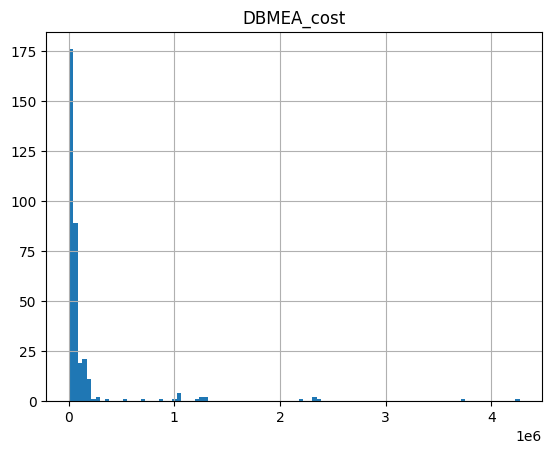

In [21]:
testingdf = df.copy()
# sort df by dbmea cost and plot the column
testingdf.sort_values(by=['DBMEA_cost'], inplace=True)
# plot histograms
testingdf.hist(column='DBMEA_cost', bins=100)



In [17]:
df

,file,GILS_cost,DBMEA_cost,GRASP_cost,GILS_time,DBMEA_time,GRASP_time,min_method,n,m,...,closeness_mean,closeness_std,closeness_var,closeness_q25,closeness_q75,prediction,selection_cost,selection_time,correct,actual_predicted
0,att48.tsp,226229.0,207771.0,301702.0,6.474685,5.288543,0.026019,DBMEA_cost,48,1176,...,0.001012,0.000205,4.221718e-08,0.000889,0.001191,DBMEA_cost,207771.0,5.288543,1,DBMEA_cost DBMEA_cost
1,berlin52.tsp,145419.0,143278.0,191072.0,6.054587,5.374160,0.031533,DBMEA_cost,52,1378,...,0.001893,0.000507,2.566472e-07,0.001447,0.002371,DBMEA_cost,143278.0,5.374160,1,DBMEA_cost DBMEA_cost
2,brazil58.tsp,532454.0,535150.0,709540.0,8.013889,9.045840,0.043413,GILS_cost,58,1711,...,0.000562,0.000145,2.104825e-08,0.000458,0.000692,GILS_cost,532454.0,8.013889,1,GILS_cost GILS_cost
3,burma14.tsp,16457.0,16457.0,18393.0,0.156218,0.082072,0.001000,GRASP_time,14,105,...,0.002193,0.000407,1.654824e-07,0.002048,0.002518,GRASP_time,18393.0,0.001000,1,GRASP_time GRASP_time
4,dantzig42.tsp,12392.0,12256.0,14523.0,2.579336,3.325098,0.016044,DBMEA_cost,42,903,...,0.014587,0.003118,9.721282e-06,0.011758,0.016824,DBMEA_cost,12256.0,3.325098,1,DBMEA_cost DBMEA_cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,srandom_91_96.tsp,1603056.0,1651652.0,2692697.0,30.021509,43.846168,0.257267,GILS_cost,91,4186,...,0.000399,0.000066,4.317079e-09,0.000352,0.000459,GILS_cost,1603056.0,30.021509,1,GILS_cost GILS_cost
435,srandom_95_81.tsp,1686640.0,1758693.0,3065490.0,39.880181,41.918330,0.294402,GILS_cost,95,4560,...,0.000380,0.000052,2.721331e-09,0.000340,0.000424,GILS_cost,1686640.0,39.880181,1,GILS_cost GILS_cost
436,srandom_96_63.tsp,1909301.0,1847337.0,2808284.0,33.306335,45.883843,0.297344,DBMEA_cost,96,4656,...,0.000404,0.000065,4.246357e-09,0.000355,0.000460,GILS_cost,1909301.0,33.306335,0,DBMEA_cost GILS_cost
437,srandom_99_74.tsp,2002650.0,1961511.0,3304424.0,46.667097,60.949679,0.331193,DBMEA_cost,99,4950,...,0.000406,0.000068,4.648060e-09,0.000346,0.000461,GILS_cost,2002650.0,46.667097,0,DBMEA_cost GILS_cost


In [18]:
df.to_csv("super_results.csv", index=False)

In [19]:
df["actual_predicted"].value_counts()

actual_predicted
DBMEA_cost DBMEA_cost    143
DBMEA_cost GILS_cost     111
GILS_cost GILS_cost      102
GILS_cost DBMEA_cost      38
GRASP_time GRASP_time     35
GRASP_time GILS_cost       6
DBMEA_cost GRASP_time      3
GILS_cost GRASP_time       1
Name: count, dtype: int64

In [20]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(df["min_method"], df["prediction"]))

              precision    recall  f1-score   support

  DBMEA_cost       0.79      0.56      0.65       257
   GILS_cost       0.47      0.72      0.57       141
  GRASP_time       0.90      0.85      0.88        41

    accuracy                           0.64       439
   macro avg       0.72      0.71      0.70       439
weighted avg       0.70      0.64      0.65       439



In [25]:
# ttest for selection cost and gils cost
stats.ttest_rel(df["selection_cost"], df["GILS_cost"])


TtestResult(statistic=-2.961734103205153, pvalue=0.003225527752721503, df=438)

In [26]:
# ttest for selection cost and dbmea cost
stats.ttest_rel(df["selection_cost"], df["DBMEA_cost"])

TtestResult(statistic=1.3064068321127715, pvalue=0.1920998259862766, df=438)

In [27]:
# wilcoxon for selection cost and gils cost
stats.wilcoxon(df["selection_cost"], df["GILS_cost"])

WilcoxonResult(statistic=6139.0, pvalue=3.334014033526328e-09)

In [28]:
# wilcoxon for selection cost and dbmea cost
stats.wilcoxon(df["selection_cost"], df["DBMEA_cost"])

WilcoxonResult(statistic=11289.5, pvalue=0.0003429686352561056)

In [2]:
df = pd.read_csv("super_results.csv")
df

,file,GILS_cost,DBMEA_cost,GRASP_cost,GILS_time,DBMEA_time,GRASP_time,min_method,n,m,...,closeness_mean,closeness_std,closeness_var,closeness_q25,closeness_q75,prediction,selection_cost,selection_time,correct,actual_predicted
0,att48.tsp,226229.0,207771.0,301702.0,6.474685,5.288543,0.026019,DBMEA_cost,48,1176,...,0.001012,0.000205,4.221718e-08,0.000889,0.001191,DBMEA_cost,207771.0,5.288543,1,DBMEA_cost DBMEA_cost
1,berlin52.tsp,145419.0,143278.0,191072.0,6.054587,5.374160,0.031533,DBMEA_cost,52,1378,...,0.001893,0.000507,2.566472e-07,0.001447,0.002371,DBMEA_cost,143278.0,5.374160,1,DBMEA_cost DBMEA_cost
2,brazil58.tsp,532454.0,535150.0,709540.0,8.013889,9.045840,0.043413,GILS_cost,58,1711,...,0.000562,0.000145,2.104825e-08,0.000458,0.000692,GILS_cost,532454.0,8.013889,1,GILS_cost GILS_cost
3,burma14.tsp,16457.0,16457.0,18393.0,0.156218,0.082072,0.001000,GRASP_time,14,105,...,0.002193,0.000407,1.654824e-07,0.002048,0.002518,GRASP_time,18393.0,0.001000,1,GRASP_time GRASP_time
4,dantzig42.tsp,12392.0,12256.0,14523.0,2.579336,3.325098,0.016044,DBMEA_cost,42,903,...,0.014587,0.003118,9.721282e-06,0.011758,0.016824,DBMEA_cost,12256.0,3.325098,1,DBMEA_cost DBMEA_cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,srandom_91_96.tsp,1603056.0,1651652.0,2692697.0,30.021509,43.846168,0.257267,GILS_cost,91,4186,...,0.000399,0.000066,4.317079e-09,0.000352,0.000459,GILS_cost,1603056.0,30.021509,1,GILS_cost GILS_cost
435,srandom_95_81.tsp,1686640.0,1758693.0,3065490.0,39.880181,41.918330,0.294402,GILS_cost,95,4560,...,0.000380,0.000052,2.721331e-09,0.000340,0.000424,GILS_cost,1686640.0,39.880181,1,GILS_cost GILS_cost
436,srandom_96_63.tsp,1909301.0,1847337.0,2808284.0,33.306335,45.883843,0.297344,DBMEA_cost,96,4656,...,0.000404,0.000065,4.246357e-09,0.000355,0.000460,GILS_cost,1909301.0,33.306335,0,DBMEA_cost GILS_cost
437,srandom_99_74.tsp,2002650.0,1961511.0,3304424.0,46.667097,60.949679,0.331193,DBMEA_cost,99,4950,...,0.000406,0.000068,4.648060e-09,0.000346,0.000461,GILS_cost,2002650.0,46.667097,0,DBMEA_cost GILS_cost


In [4]:
# effect size test for selection cost and gils cost
import numpy as np
import scipy.stats as stats
import statsmodels.stats.api as sms

# calculate the effect size between selection cost and gils cost
cm = sms.CompareMeans(sms.DescrStatsW(df["selection_cost"]), sms.DescrStatsW(df["GILS_cost"]))
print(cm.tconfint_diff(usevar='unequal'))


(-70937.36068885273, 68779.28324010561)


In [5]:
import numpy as np
from scipy import stats

def cohens_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt((np.var(group1, ddof=1) + np.var(group2, ddof=1)) / 2)
    d = mean_diff / pooled_std
    return d


effect_size = cohens_d(df["selection_cost"], df["GILS_cost"])
print("Cohen's d:", effect_size)

Cohen's d: -0.0020462098662352383
